

<u><b>Lab - 4 : </b></u> Object Recognition using HOG and Machine Learning

Load MNIST Dataset

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.int8)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Extract HOG Features

In [2]:
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for image in images:
        img = image.reshape(28, 28)
        features = hog(
            img,
            orientations=9,
            pixels_per_cell=(7, 7),
            cells_per_block=(2, 2),
            block_norm='L2-Hys'
        )
        hog_features.append(features)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)


e:\conda\envs\ser\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


 Visualizing the hog features

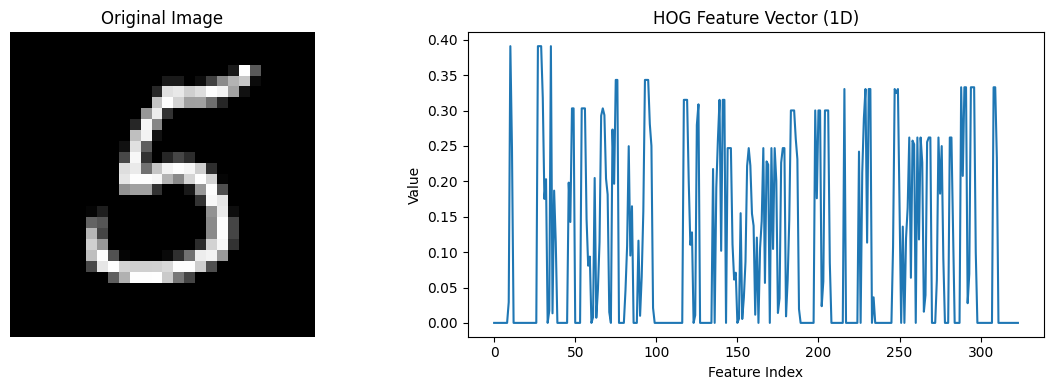

In [3]:
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

image = X_train[0].reshape(28, 28)

features = hog(
    image,
    orientations=9,
    pixels_per_cell=(7, 7),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=False
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(features)
plt.title('HOG Feature Vector (1D)')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = LinearSVC()
clf.fit(X_train_hog, y_train)

y_pred = clf.predict(X_test_hog)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Test accuracy: 0.9696428571428571


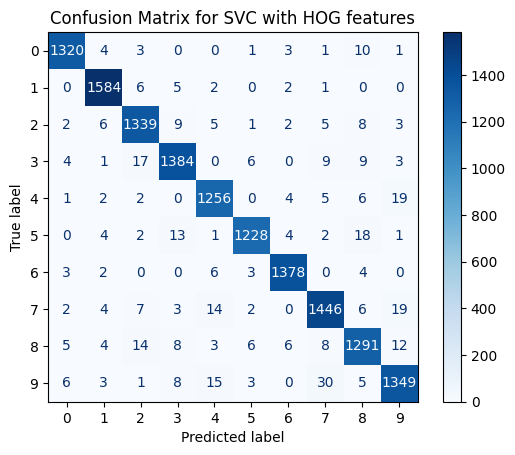

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVC with HOG features")
plt.show()